<a href="https://colab.research.google.com/github/sonaa-gupta/brain-tumor-dtection-and-segementation/blob/main/braintumor%20segmentation/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  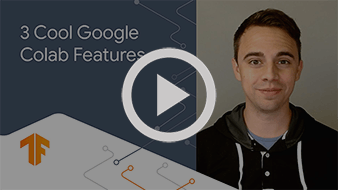
  </a>
</center>

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,LambdaCallback
from keras.layers import Input,Dropout, Dense,GlobalAveragePooling2D
from keras.models import Sequential,Model


In [3]:
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
y_train = []
image_size = 200

In [5]:
train_path = '/content/drive/MyDrive/brain/Training'
labels = os.listdir(train_path)
print(labels)

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']


In [6]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [7]:
test_path='/content/drive/MyDrive/brain/Testing'

In [8]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [9]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
len(X_train), len(y_train)

(3301, 3301)

In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
X_train.shape, y_train.shape

((3301, 200, 200, 3), (3301,))

In [13]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((3301, 200, 200, 3), (3301,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [15]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[3, 0, 0, 1, 1]

In [16]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [17]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [18]:
net = ResNet50(
    weights='imagenet', # Load weights pre-trained on ImageNet.
     include_top=False, # Do not include the ImageNet classifier at the top.
     input_shape=(image_size,image_size,3))
     

94765736/94765736 [==============================] - 1s 0us/step


In [19]:
import keras
from keras.layers import Input, Dense, Dropout, Activation
from keras.models import Model

model = net.output
model = Dense(2048, activation='selu')(model)
model = Dropout(0.4)(model)
model = Dense(2048, activation='selu')(model)
model = Dropout(0.4)(model)
model = Flatten()(model)
model = Dense(4, activation='sigmoid')(model)
model = Model(inputs= net.input, outputs= model)

In [20]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [26]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
val_ds=(X_test,y_test)

early = tf.keras.callbacks.EarlyStopping(monitor="acc", mode="max",restore_best_weights=True, patience=5)
mc = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)
H = model.fit(X_train,y_train_new,validation_split=0.1,epochs=90,verbose=1, callbacks=[mc,es])

Epoch 1/90
84/84 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9989
Epoch 1: val_loss improved from inf to 0.02773, saving model to classifier-resnet-weights.hdf5
84/84 [==============================] - 37s 441ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0277 - val_accuracy: 0.9899
Epoch 2/90
84/84 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9970
Epoch 2: val_loss improved from 0.02773 to 0.00019, saving model to classifier-resnet-weights.hdf5
84/84 [==============================] - 33s 396ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 1.9467e-04 - val_accuracy: 1.0000
Epoch 3/90
84/84 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9981
Epoch 3: val_loss improved from 0.00019 to 0.00016, saving model to classifier-resnet-weights.hdf5
84/84 [==============================] - 33s 390ms/step - loss: 0.0038 - accuracy: 0.9981 - val_loss: 1.5952e-04 - val_accuracy: 1.0000
Epoch 4/90
84/84 [===

In [76]:
acc = H.history['accuracy']
los = H.history['loss'] 
val=H.history['val_accuracy']
val_loss = H.history['val_loss']

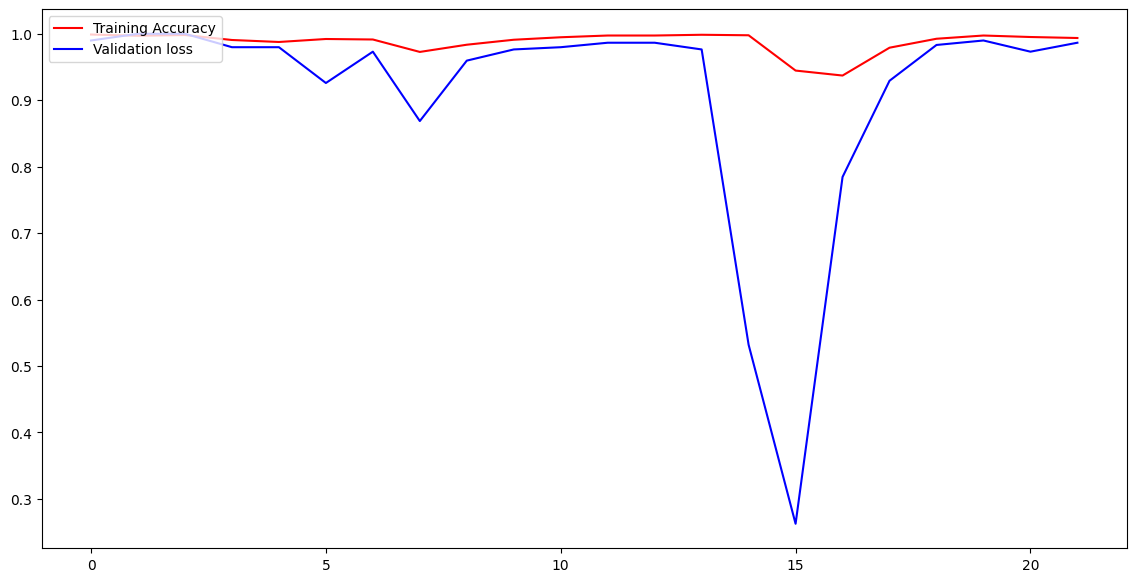

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val, 'b', label = 'Validation loss')
plt.legend(loc = 'upper left')
plt.show()

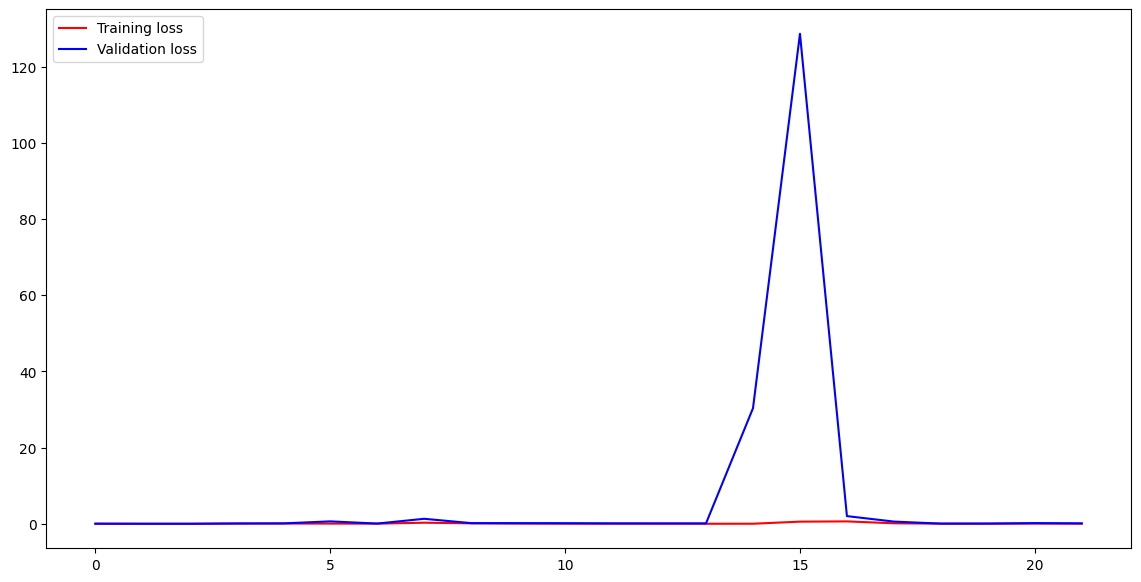

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, los, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend(loc = 'upper left')
plt.show()

In [29]:
train_result = model.evaluate(X_train, y_train_new)

93/93 [==============================] - 9s 92ms/step - loss: 0.0172 - accuracy: 0.9963


In [30]:
val_result = model.evaluate(X_test,y_test_new)

no_augmented_df = pd.DataFrame(zip(train_result,val_result),columns=['Train','Val'],index=['Loss','Acc'])
no_augmented_df

11/11 [==============================] - 1s 137ms/step - loss: 0.3918 - accuracy: 0.9728


,Train,Val
Loss,0.017209,0.391782
Acc,0.996296,0.972810


In [36]:
ypred_val = model.predict(X_test)



11/11 [==============================] - 1s 82ms/step


11/11 [==============================] - 1s 86ms/step


In [44]:
num_samples = y_val.shape[0]
X_test_part1 = X_test[:num_samples]


# additional evaluation using X_test_part2 and ypred_val_part2

In [64]:
ypred_labels = np.argmax(ypred_val, axis=1)
ypred_labels
ypred_labels.shape

(331,)

In [65]:
y_val = np.argmax(y_test_new, axis=1)

In [79]:
print(y_val.shape, ypred_labels.shape)

(331,) (331,)


In [68]:
print(confusion_matrix(y_val,ypred_labels))
print('\n', classification_report(y_val,ypred_labels))


[[ 50   0   0   0]
 [  4  80   1   1]
 [  0   3 104   0]
 [  0   0   0  88]]

               precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       0.96      0.93      0.95        86
           2       0.99      0.97      0.98       107
           3       0.99      1.00      0.99        88

    accuracy                           0.97       331
   macro avg       0.97      0.98      0.97       331
weighted avg       0.97      0.97      0.97       331

